In [264]:
!pip install catboost
!pip install lightgbm
!pip insatll xgboost

ERROR: unknown command "insatll" - maybe you meant "install"


In [265]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [266]:
# 한글 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
import matplotlib.font_manager as fm
font10 = fm.FontProperties(fname=path, size=10)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [267]:
# 한글 폰트 경로 지정
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

In [268]:
import pandas as pd
import random
import os
import numpy as np
#훈련 데이터 / 테스트 데이터 파일 입력

train_path = "/content/drive/MyDrive/card_train.csv"
test_path =  "/content/drive/MyDrive/card_test.csv"
train_df = pd.read_csv(train_path)
y_train = train_df['Segment']

In [269]:
recommended_columns = [
    # 예시 처
    "남녀구분코드", "연령", "Life_Stage","회원여부_연체",
    "이용금액_할부_R12M","입회경과개월수_신용","월상환론한도금액","카드이용한도금액","증감율_이용금액_체크_전월","이용금액_일시불_R12M",
    "포인트_이용포인트_R12M","이용건수_체크_R12M","이용건수_신용_R12M","유효카드수_신용체크","이용금액_체크_R12M",
    "불만제기후경과월_R12M","RP후경과월","_1순위카드이용금액","포인트_적립포인트_R12M",
    "_1순위업종", "_1순위쇼핑업종", "_1순위교통업종","_1순위카드이용건수","월중평잔",
     "_2순위업종_이용금액", "_2순위업종","_2순위카드이용금액","_2순위교통업종","_2순위쇼핑업종",
    "증감율_이용건수_신용_분기","CA한도금액","변동률_일시불평잔","강제한도감액금액_R12M","일시상환론한도금액","변동률_할부평잔","상향가능한도금액","카드론이용건수_누적","이용건수_할부_R12M","정상청구원금_B5M","이용개월수_체크_R12M","연체입금원금_B5M","정상입금원금_B5M","이용개월수_할부_R12M","최초카드론이용경과월"
]


In [270]:
#선택한 피처만 훈련데이터로 만
X = train_df[recommended_columns]
#object인 컬럼만 만드는 리스트 컴프리핸션
oj_columns = [x for x in X.columns if X[x].dtype == "object"]
oj_columns

['연령',
 'Life_Stage',
 '_1순위업종',
 '_1순위쇼핑업종',
 '_1순위교통업종',
 '_2순위업종',
 '_2순위교통업종',
 '_2순위쇼핑업종']

In [271]:
from sklearn.preprocessing import LabelEncoder

#전처리 함수
def preprocessing(df):
    oj_columns = [x for x in df.columns if df[x].dtype == "object"]
    for cate in oj_columns:
        df[cate] = df[cate].fillna("missing")  # NaN 처리 먼저
        le = LabelEncoder()
        df[cate] = le.fit_transform(df[cate])

    return df

In [272]:
#X를 전처리 한다
x_train = preprocessing(X)
x_train

<ipython-input-271-0893276ea463>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cate] = df[cate].fillna("missing")  # NaN 처리 먼저
<ipython-input-271-0893276ea463>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cate] = le.fit_transform(df[cate])
<ipython-input-271-0893276ea463>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,남녀구분코드,연령,Life_Stage,회원여부_연체,이용금액_할부_R12M,입회경과개월수_신용,월상환론한도금액,카드이용한도금액,증감율_이용금액_체크_전월,이용금액_일시불_R12M,...,변동률_할부평잔,상향가능한도금액,카드론이용건수_누적,이용건수_할부_R12M,정상청구원금_B5M,이용개월수_체크_R12M,연체입금원금_B5M,정상입금원금_B5M,이용개월수_할부_R12M,최초카드론이용경과월
0,2,4,1,0,0,39,180503,100009,0.000000,8166,...,0.999998,0,0,0,1044,0,474,569,0,999
1,1,1,0,0,0,39,0,41180,0.000000,41278,...,0.999998,6,0,0,5606,0,2479,3127,0,999
2,2,3,5,0,0,172,206098,40798,0.000000,2979,...,0.999998,6,0,0,0,0,0,0,0,999
3,2,4,1,0,24373,202,206308,29999,0.000000,37780,...,1.053473,5,0,9,6425,0,805,5619,8,999
4,2,1,4,0,15966,3,93789,18989,0.002695,2248,...,0.905738,4,0,0,1294,12,0,1294,2,999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70555,1,2,4,0,3982,11,151553,30003,0.000000,22659,...,0.999998,5,0,4,2388,0,931,1457,2,999
70556,1,3,5,0,0,278,0,52017,0.000000,25655,...,0.999998,0,2,0,24381,0,13383,10997,0,96
70557,2,4,3,0,28782,191,205060,41444,0.000000,27394,...,1.051218,5,1,11,10053,0,4418,5635,8,19
70558,2,3,3,0,0,105,160705,50371,0.000000,952,...,0.999998,9,0,0,1719,0,1719,0,0,999


In [273]:
#모델 학습 및 앙상블 예측
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#변수 재정의
X = x_train
y = y_train

#라벨 인코
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)
#불균형 확인

y = pd.Series(y)

print(y.value_counts())
print(y.value_counts(normalize=True))

4    56505
3    10270
2     3753
0       28
1        4
Name: count, dtype: int64
4    0.800808
3    0.145550
2    0.053189
0    0.000397
1    0.000057
Name: proportion, dtype: float64


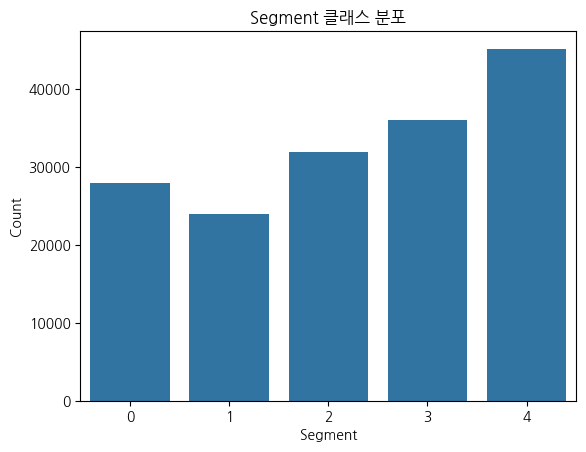

In [ ]:
#Segment 클래스 분류 시각화 확인
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Segment 클래스 분포")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.show()

In [274]:
#SMOTE + RandomOverSampler 조합

from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
import pandas as pd

# 1. SMOTE로 클래스 2, 3 보완
smote = SMOTE(
    sampling_strategy={2: 40000, 3: 45000},  # 원하는 수치로 증강
    random_state=42
)
X_sm, y_sm = smote.fit_resample(X, y)

# 2. RandomOverSampler로 클래스 0, 1 복제
ros = RandomOverSampler(
    sampling_strategy={0: 35000, 1: 30000},  # 최소 1,000개로 맞춤
    random_state=42
)
X_resampled, y_resampled = ros.fit_resample(X_sm, y_sm)

# 확인
print("클래스 분포:")
print(pd.Series(y_resampled).value_counts())

클래스 분포:
4    56505
3    45000
2    40000
0    35000
1    30000
Name: count, dtype: int64


In [275]:
# 하이퍼 파라미터 튜닝 및 앙상블

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import numpy as np

# 1. 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# 2. F1 scorer 정의
f1_macro = make_scorer(f1_score, average='macro')

# 3. XGBoost 튜닝
param_xgb = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
grid_xgb = GridSearchCV(xgb, param_xgb, scoring=f1_macro, cv=3, n_jobs=-1)
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_

# 4. LightGBM 튜닝
param_lgb = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}
lgb = LGBMClassifier(random_state=42)
grid_lgb = GridSearchCV(lgb, param_lgb, scoring=f1_macro, cv=3, n_jobs=-1)
grid_lgb.fit(X_train, y_train)
best_lgb = grid_lgb.best_estimator_

# 5. CatBoost 기본 (튜닝은 선택)
cat = CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)
cat.fit(X_train, y_train)

# 6. soft voting 예측
xgb_proba = best_xgb.predict_proba(X_val)
lgb_proba = best_lgb.predict_proba(X_val)
cat_proba = cat.predict_proba(X_val)

ensemble_proba = (xgb_proba + lgb_proba + cat_proba) / 3
ensemble_pred = np.argmax(ensemble_proba, axis=1)  # 가장 큰 값 반환

# 7. 평가
print("F1 Score (macro):", f1_score(y_val, ensemble_pred, average='macro'))
print("F1 Score (weighted):", f1_score(y_val, ensemble_pred, average='weighted'))
print("\n📊 Classification Report:")
print(classification_report(y_val, ensemble_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:09:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6550
[LightGBM] [Info] Number of data points in the train set: 165204, number of used features: 44
[LightGBM] [Info] Start training from score -1.774977
[LightGBM] [Info] Start training from score -1.929127
[LightGBM] [Info] Start training from score -1.641445
[LightGBM] [Info] Start training from score -1.523662
[LightGBM] [Info] Start training from score -1.295995
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [ ]:
#Kfold교차검증
#과적합인지 확인합니다
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, make_scorer
from xgboost import XGBClassifier
import numpy as np

In [ ]:
f1_macro = make_scorer(f1_score, average='macro')
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [ ]:
model_xgb = xgb
model_lgb = lgb
model_cat = cat

In [ ]:
scores_xgb = cross_val_score(
    model_xgb,
    X_resampled, y_resampled,
    scoring=f1_macro,
    cv=cv,
    n_jobs=-1,  # 병렬 처리
    verbose=1
)

scores_lgb = cross_val_score(
    model_lgb,
    X_resampled, y_resampled,
    scoring=f1_macro,
    cv=cv,
    n_jobs=-1,  # 병렬 처리
    verbose=1
)

scores_cat = cross_val_score(
    model_cat,
    X_resampled, y_resampled,
    scoring=f1_macro,
    cv=cv,
    n_jobs=-1,  # 병렬 처리
    verbose=1
)

print("------------XGB----------------")
print("Fold별 F1 (macro):", scores_xgb)
print("평균 F1 (macro):", np.mean(scores_xgb))
print("------------LGB----------------")
print("Fold별 F1 (macro):", scores_lgb)
print("평균 F1 (macro):", np.mean(scores_lgb))
print("------------CAT----------------")
print("Fold별 F1 (macro):", scores_cat)
print("평균 F1 (macro):", np.mean(scores_cat))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   58.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


------------XGB----------------
Fold별 F1 (macro): [0.94063809 0.94231465 0.94139014]
평균 F1 (macro): 0.9414476279506335
------------LGB----------------
Fold별 F1 (macro): [0.92451774 0.92549626 0.92507614]
평균 F1 (macro): 0.9250300460768438
------------CAT----------------
Fold별 F1 (macro): [0.91546147 0.91567846 0.91511375]
평균 F1 (macro): 0.9154178943585695


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
